<a href="https://colab.research.google.com/github/spencer18001/Clustering-And-Dimensionality-Reduction---Deep-Dive/blob/main/05/05_note.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PCA

#### PCA 概述

principal component analysis (PCA: 主成分分析):
- 保持原本的資料模式, 透過座標軸轉換, 更好的去體現資料的 variability
- 新的座標軸 (principal component) 是根據資料的變異性來選擇的, 目的是找到最大程度反映資料 variance 的方向
- 可以簡化資料維度, 同時保留重要 (variance 大) 的信息

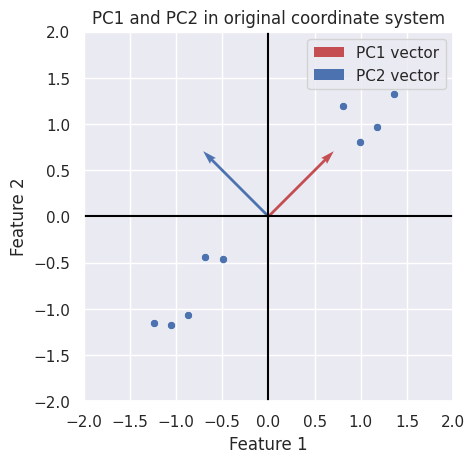
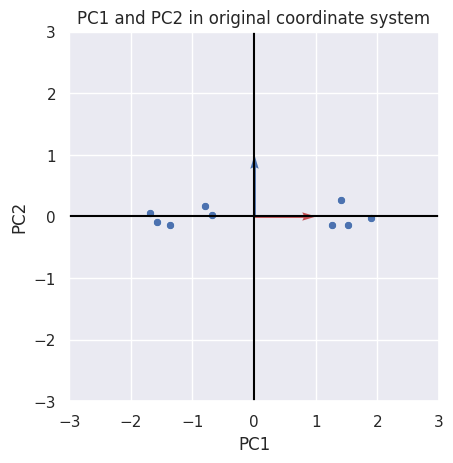

principal component (PC) 可以視為
- 最大化 variance
- 最小化近似 error (MSE)
    - 提供最接近資料的低維 linear surface
    - [2.2 The Objective Function](https://timroughgarden.org/s17/l/l7.pdf)

![][image1]

[image1]: <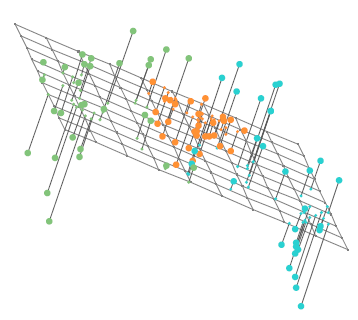>
[圖源](https://www.statlearning.com/)

#### PCA 原理

假設資料矩陣置中

$X_{p \times n}=\begin{bmatrix}
x_{11}-\bar{x}_1 & \cdots & x_{1n}-\bar{x}_1 \\
\vdots & \ddots & \vdots \\
x_{p1}-\bar{x}_p & \cdots & x_{pn}-\bar{x}_p
\end{bmatrix}$, $\bar{x}_i=\frac{1}{n}\sum_{j=1}^{n} x_{ij}$

$\because C_X=\frac{1}{n} XX^T$ 是 symmetrix

$\therefore C_X$ 為 orthogonally diagonalizable $\rightarrow C_X=PDP^T$
- $P$: orthogonal matrix
  - $\{P_{:,j}\}$ 為 orthonormal eigen vectors
  - $P^T=P^{-1}$
- $D$: diagonal matrix
  - $D_{ii}$ 為 eigen vector

令 $Y=P^TX$ $\hspace{1em}$ **`Q1: 如何確定 Y 資料矩陣也為置中的型式`**

$\begin{aligned}
C_Y &= \frac{1}{n} YY^T \\
    &= \frac{1}{n} P^TXX^TP \\
    &= P^TC_XP \\
    &= P^TPDP^TP \hspace{1em} (由於 P^T=P^{-1}) \\
    &= D
\end{aligned}
$

#### PCA 特性

- 為座標軸轉換 (change of basis)
  - $Y=P^{-1}X$
  - principal component: 新座標軸
- 由原本的 feature 線性組合出新的 feature
  - feature: 資料投影在座標軸的分量
  - $proj(PC_i, X_{:,j})=Y_{ij}=(P_{:,i})^TX_{:,j}$
- 新座標軸 (principal component) 為原資料集 covariance matrix ($C_X$) 的 eigenvector
- 新 feature 的 variance 為原資料集 covariance matrix ($C_X$) 的 eigenvalue
- principal component 按 variance 由大到小排列
- 新 feature 是 uncorrelated $\hspace{1em}$ **`Q2: 如何用幾何的方式思考`**
- orthogonal change 不改變資料的 total variance
  - $\sum_{i=1}^{p} (C_{Y})_{ii}=\sum_{i=1}^{p} (C_{X})_{ii}$


explained variance ratio:
- 新 feature 的 variance:
  - $Var[Y_{i,:}]=(C_Y)_{ii}=D_{ii}$
- principal component $m$ 的 explained variance ratio:
  - $\frac{Var[Y_{m,:}]}{\sum_{i=1}^{p} Var[Y_{i,:}]}=\frac{(C_Y)_{mm}}{\sum_{i=1}^{p} (C_Y)_{ii}}=\frac{D_{mm}}{tr(D)}$


在執行 PCA 之前, 通常會將每個 variable 的 standard deviation 縮放為 1

#### 問題

##### **`Q1: 如何確定 Y 資料矩陣也為置中的型式`**

$X_{center}=\begin{bmatrix}
x_{11}-\bar{x}_1 & \cdots & x_{1n}-\bar{x}_1 \\
\vdots & \ddots & \vdots \\
x_{p1}-\bar{x}_p & \cdots & x_{pn}-\bar{x}_p
\end{bmatrix}$, $\bar{x}_i=\frac{1}{n}\sum_{j=1}^{n} x_{ij}$

$\bar{x}_i=\frac{1}{n}\sum_{j=1}^{n} x_{ij}=\frac{1}{n}X_{i,:}\begin{bmatrix}
1 \\
\vdots \\
1
\end{bmatrix}
$

$\bar{X}=
\begin{bmatrix}
\bar{x}_1 & \cdots & \bar{x}_1 \\
\vdots & \ddots & \vdots \\
\bar{x}_p & \cdots & \bar{x}_p
\end{bmatrix}=
\frac{1}{n}X\begin{bmatrix}
1 & \cdots & 1 \\
\vdots & \ddots & \vdots \\
1 & \cdots & 1
\end{bmatrix}
$

$\begin{align*}
P^T X_{\text{center}} &= P^T (X - \bar{X}) \\
&= P^T X - P^T \frac{1}{n} X \begin{bmatrix}
1 & \cdots & 1 \\
\vdots & \ddots & \vdots \\
1 & \cdots & 1
\end{bmatrix} \\
&= P^T X - \frac{1}{n} P^T X \begin{bmatrix}
1 & \cdots & 1 \\
\vdots & \ddots & \vdots \\
1 & \cdots & 1
\end{bmatrix} \hspace{1em} (設 Y=P^TX) \\
&= Y - \bar{Y} \\
&= Y_{\text{center}}
\end{align*}$

##### **`Q2: 如何用幾何的方式思考`**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import random

random.seed(10)
np.random.seed(10)
sns.set_theme()

In [ ]:
base_url = 'https://github.com/spencer18001/Clustering-And-Dimensionality-Reduction---Deep-Dive/blob/main'
relative_url = 'data/0512_pca_2d_dataset.csv'
artificial_df = pd.read_csv(f'{base_url}/{relative_url}?raw=1')

artificial_df[:] = StandardScaler().fit_transform(artificial_df)

In [ ]:
cov_mtx = artificial_df.cov().to_numpy()
eigenvalues, eigenvectors = np.linalg.eig(cov_mtx)
cov_mtx[0,1], eigenvalues, eigenvectors

(1.1029349680491334,
 array([2.22793497, 0.02206503]),
 array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

In [54]:
fig, ax = plt.subplots()
sns.scatterplot(artificial_df,x='Feature 1',y='Feature 2', ax=ax)
plt.hlines(xmin=-5, xmax=30, y=0, color='black')
plt.vlines(ymin=-5, ymax=50, x=0, color='black')
plt.xlim([-2, 2])
plt.ylim([-2, 2])

plt.quiver(
    0, 0,
    eigenvectors[:, 0][0],
    eigenvectors[:, 0][1],
    angles='xy', # arrow direction in data coordinates
    scale_units='xy',
    scale=1, color='r',
    label="PC1 vector",
    alpha=0.3
)
plt.quiver(
    0, 0,
    eigenvectors[:, 1][0], eigenvectors[:, 1][1],
    angles='xy', scale_units='xy',
    scale=1, color='b',
    label="PC2 vector",
    alpha=0.3
)

plt.gca().set_aspect('equal', adjustable='box')
plt.legend()

def rotate_vector(vector, angle):
    """旋轉向量 vector 逆時針角度 angle（弧度）"""
    rotation_matrix = np.array([
        [np.cos(angle), -np.sin(angle)],
        [np.sin(angle),  np.cos(angle)]
    ])
    return np.dot(rotation_matrix, vector)

# standard basis
eigenvectors_try = np.array([
    [1, 0],  # PC1 vector
    [0, 1]   # PC2 vector
])
quiver1 = ax.quiver(0, 0, eigenvectors_try[0, 0], eigenvectors_try[0, 1], angles='xy', scale_units='xy', scale=1, color='r')
quiver2 = ax.quiver(0, 0, eigenvectors_try[1, 0], eigenvectors_try[1, 1], angles='xy', scale_units='xy', scale=1, color='b')

def update_quiver(num, quiver1, quiver2, eigenvectors):
    angle = np.radians(num)  # 每幀增加 1 度
    rotated_vectors = np.array([rotate_vector(vec, angle) for vec in eigenvectors_try])

    # 更新 quiver 的數據
    quiver1.set_UVC(rotated_vectors[0, 0], rotated_vectors[0, 1])
    quiver2.set_UVC(rotated_vectors[1, 0], rotated_vectors[1, 1])

    cov = np.cov(rotated_vectors@artificial_df.to_numpy().T)[0, 1]
    ax.set_title(f'cov: {cov:.3f}')
    return quiver1, quiver2

# 創建動畫
ani = animation.FuncAnimation(
    fig, update_quiver, frames=45, fargs=(quiver1, quiver2, eigenvectors),
    interval=200, blit=True, repeat=True, repeat_delay=10000
)

# https://stackoverflow.com/questions/61103994/embedding-matplotlib-animations-in-python-google-colab-notebook
from IPython.display import HTML
plt.close()
HTML(ani.to_jshtml())